(Risk-neutral) Pricing of a European Call option using Monte Carlo simulations.

We assume constant interest rate, and that the underlying follows the Geometric Brownian motion.



In [1]:
import random
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [89]:
#Define Variables
S = 101.15     #starting stock price (i.e. last available real stock price)
K=98.01      # strike price
T = 252     #Number of trading days (this is a whole year)
r = 0.01 #0.0274     #risk-free rate
vol = 0.0991   #Volatility

dt = 1/T  # step size
Np=20000   # number of paths

In [90]:
def MCsim(S, K, T, r, vol, dt, Np):
    price_df=pd.DataFrame(index=range(T+1), columns=range(1,Np+1) )
    price_df.iloc[0,:]=[S]*Np
    for i in range(Np):
        for u in range(1,T+1):
            Wt=np.random.normal(0, dt  )
            price_df.iloc[u,i]=price_df.iloc[u-1,i]*np.exp( (r-(vol**2)/2)*dt +  ( vol*Wt)   )
    display(price_df.head())
    price_df.iloc[:,:30].plot()
    values=[(x-K) if (x-K)>0 else 0  for x in price_df.iloc[-1, :]]
    expected_value=(sum(values)/Np)*np.exp(-r*(T/252))
    sigma = np.std( [ x*np.exp(-r*(T/252))  for x in values if x>0] )
    str='The value of the option is ${} with std {}'.format(expected_value, sigma)
    print(str)
    return price_df, values
    #price_df[:5,].plot()

,1,2,3,4,5,6,7,8,9,10,...,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
0,101.15,101.15,101.15,101.15,101.15,101.15,101.15,101.15,101.15,101.15,...,101.15,101.15,101.15,101.15,101.15,101.15,101.15,101.15,101.15,101.15
1,101.151159,101.126532,101.106165,101.12056,101.16105,101.148985,101.153282,101.171125,101.137205,101.110109,...,101.229471,101.113109,101.076286,101.134354,101.123846,101.20085,101.197261,101.106159,101.21173,101.245237
2,101.144317,101.159462,101.096688,101.112574,101.153573,101.183089,101.107507,101.229944,101.122119,101.150306,...,101.242516,101.101549,101.018857,101.157234,101.168738,101.182647,101.203555,101.114143,101.183918,101.227091
3,101.144214,101.128855,101.123561,101.14395,101.110474,101.166936,101.099448,101.255201,101.126228,101.107934,...,101.294867,101.077574,101.049988,101.073577,101.120198,101.223556,101.22363,101.119985,101.20214,101.22501
4,101.130629,101.084834,101.088288,101.089623,101.083904,101.15073,101.138663,101.216215,101.160132,101.044483,...,101.287504,101.086463,101.075777,101.09288,101.09373,101.210577,101.258157,101.068734,101.164336,101.248451


<IPython.core.display.Javascript object>


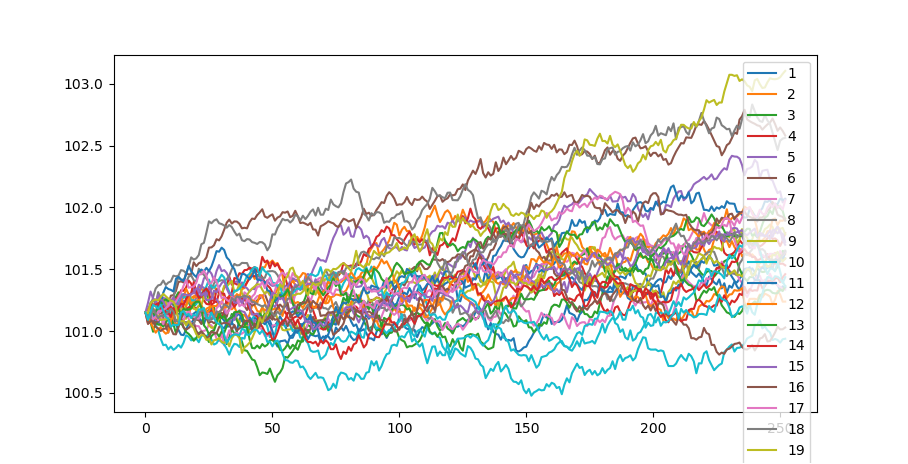

The value of the option is $3.621611092960836 with std 0.6185332752825234


In [91]:
prices, call_payoff=MCsim(S, K, T, r, vol, dt, Np)

<IPython.core.display.Javascript object>


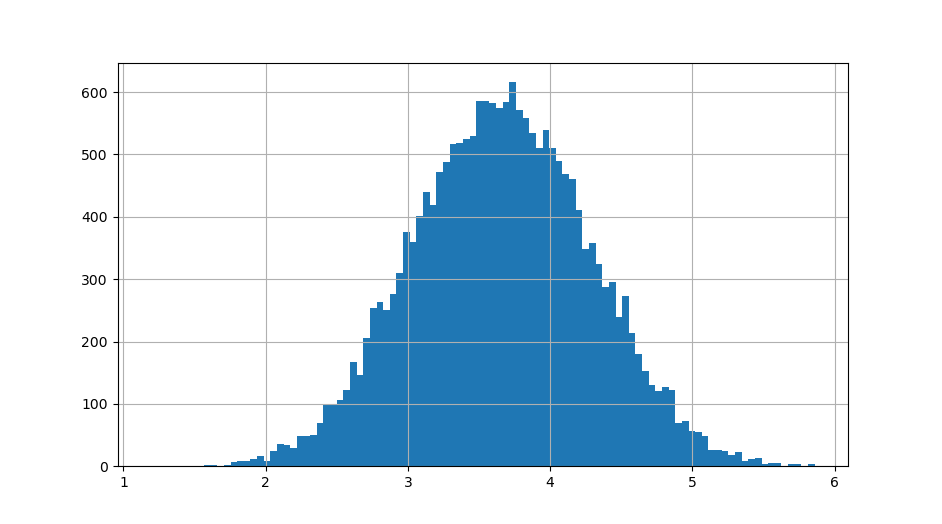

<AxesSubplot:>

In [92]:
plt.figure()
call_payoff=pd.Series(call_payoff)
call_payoff.hist(bins=100)